# Analysing evaluation results for composite reward with CAPPED accum waiting time

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_rows", None)     # Show all rows
pd.set_option("display.max_colwidth", None) # Show full width of columns
pd.set_option("display.width", 1000)        # Set the total width of the terminal output

import sys 
sys.path.append("../")
from data_analysis_functions import generate_summary_df_from_csv, get_df_from_csv, get_trained_and_fixed_from_csv # type: ignore

In [2]:
# sys.path.remove("data_analysis_after_train")
TRAINED_CHECKPOINT_PATHS = ["reward_experiments/2x2grid/combined_reward_with_queue_length/EVALUATION/PPO_2024-05-06_11_39__alpha_0.45",
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_12_05__alpha_0.6", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_14_43__alpha_0.8", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_15_54__alpha_0.7", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_17_47__alpha_0.65",
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_18_55__alpha_0.75", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_19_57__alpha_0.9", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_21_00__alpha_1", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_21_58__alpha_1.1", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-18_11_46__alpha_0.6",
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-18_15_47__alpha_1.5",
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-18_17_19__alpha_2",
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-18_19_58__delta_wait_time_reward_capped", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-18_20_46__alpha_3", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-18_23_01__alpha_5", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-20_09_18__alpha_10",
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-20_10_39__alpha_1_reduced_observation_space",
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-20_13_16__alpha_1_single_observ", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-16_09_54__alpha_0_from_2x2_diff_acc"
                            ]

TRAINED_CHECKPOINT_PATHS_ABS = [os.path.join("/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean", x) for x in TRAINED_CHECKPOINT_PATHS]

In [3]:
def concaten_alpha_tuning_summary_for_specific_seed(seed):
    '''
    Takes in a seed, and calls the generate summary dataframe. 
    '''

    fixed_tc_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[0], 
                                    eval_dir = "fixed_tc", 
                                    df_row_label = "fixed_tc",
                                    seed = seed)
    # trained_0_6_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[1], 
    #                                 eval_dir = "trained", 
    #                                 df_row_label = "alpha_0_6",
    #                                 seed = seed)
    trained_0_8_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[2], 
                                    eval_dir = "trained", 
                                    df_row_label = "alpha_0_8",
                                    seed = seed)
    trained_0_7_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[3], 
                                    eval_dir = "trained", 
                                    df_row_label = "alpha_0_7",
                                    seed = seed)
    trained_0_65_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[4], 
                                eval_dir = "trained", 
                                df_row_label = "alpha_0_65",
                                seed = seed)
    trained_0_75_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[5], 
                                eval_dir = "trained", 
                                df_row_label = "alpha_0_75",
                                seed = seed)
    trained_0_9_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[6], 
                                eval_dir = "trained", 
                                df_row_label = "alpha_0_9",
                                seed = seed)
    trained_1_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[7], 
                                eval_dir = "trained", 
                                df_row_label = "alpha_1",
                                seed = seed)
    trained_1_1_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[8], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_1_1",
                            seed = seed)
    trained_0_6_constant_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[9], # this is with constant conditions! 
                            eval_dir = "trained", 
                            df_row_label = "alpha_0_6",
                            seed = seed)
    trained_1_5_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[10], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_1_5",
                            seed = seed)
    trained_2_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[11], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_2",
                            seed = seed)
    trained_delta_wait_time_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[12], 
                            eval_dir = "trained", 
                            df_row_label = "trained_delta_wait_time",
                            seed = seed)
    trained_3_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[13], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_3",
                            seed = seed)
    trained_5_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[14], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_5",
                            seed = seed)
    trained_10_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[15], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_10",
                            seed = seed)
    trained_0_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[18], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_0",
                            seed = seed)
    
    alpha_tuning_experiment_df = pd.concat([fixed_tc_df,
                                    #  trained_0_6_df,
                                     trained_0_df,
                                     trained_0_6_constant_df,
                                     trained_0_65_df,
                                     trained_0_7_df,
                                     trained_0_75_df,
                                     trained_0_8_df,
                                     trained_0_9_df,
                                     trained_1_df,
                                     trained_1_1_df, 
                                     trained_1_5_df,
                                     trained_2_df,
                                     trained_3_df,
                                     trained_5_df,
                                     trained_10_df,
                                     trained_delta_wait_time_df], axis=0)
    return alpha_tuning_experiment_df

def concaten_reducing_obs_investigation_summary_for_specific_seed(seed):
    '''
    Takes in a seed, and calls the generate summary dataframe. 
    '''
    fixed_tc_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[0], 
                                    eval_dir = "fixed_tc", 
                                    df_row_label = "fixed_tc",
                                    seed = seed)
    
    trained_1_reduced_obs_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[16], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_1_reduced_observations",
                            seed = seed)
    trained_1_single_obs_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[17], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_1_single_obs",
                            seed = seed)
    trained_1_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[7], 
                                eval_dir = "trained", 
                                df_row_label = "alpha_1",
                                seed = seed)
    trained_delta_wait_time_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[12], 
                            eval_dir = "trained", 
                            df_row_label = "trained_delta_wait_time",
                            seed = seed)
    reducing_obs_experiment_df = pd.concat([fixed_tc_df,
                                    trained_1_df,
                                    trained_1_reduced_obs_df,
                                    trained_1_single_obs_df, 
                                    trained_delta_wait_time_df], axis=0)
    return reducing_obs_experiment_df

get dfs for all seeds, and concat

In [4]:
SUMO_SEEDS = [10, 15, 22, 31, 55, 39, 83, 49, 51, 74]
SUMO_SEEDS = [10, 22, 39, 31, 55]

SUMO_SEEDS = [10, 15, 22, 31, 55, 39, 83, 49, 51, 74]

alpha_dfs = [concaten_alpha_tuning_summary_for_specific_seed(seed) for seed in SUMO_SEEDS]

# Step 2: Concatenate them along the row axis
alpha_df_combined = pd.concat(alpha_dfs, axis=0, ignore_index=False)

alpha_df_combined

,sys_abs_accel_episode_mean,sys_abs_accel_episode_rms,sys_abs_accel_episode_var,sys_abs_accel_episode_sum,sys_abs_accel_episode_integral,sys_abs_accel_episode_ms,sys_avg_speed_episode_mean,sys_avg_speed_episode_max,sys_avg_speed_episode_min,sys_avg_speed_episode_range,sys_avg_speed_episode_median,sys_avg_speed_episode_variance,sys_total_stopped_episode_mean,sys_avg_waiting_time_episode_mean,1_abs_accel_sum,2_abs_accel_sum,5_abs_accel_sum,6_abs_accel_sum,1_abs_accel_mean,2_abs_accel_mean,5_abs_accel_mean,6_abs_accel_mean,1_accumulated_waiting_time_mean,2_accumulated_waiting_time_mean,5_accumulated_waiting_time_mean,6_accumulated_waiting_time_mean,all_agents_abs_accel_episode_rms,all_agents_abs_accel_episode_mean,tot_agent_stopped_episode_mean,tot_agent_stopped_episode_sum,tot_agent_accum_wait_time
fixed_tc,17.799791,19.427774,60.617974,88998.956683,88978.900209,377.438422,6.265263,15.287334,0.272280,15.015054,6.576319,4.984019,11.6588,241.2870,21770.531872,15099.992729,15729.443930,10825.662088,4.354106,3.019999,3.145889,2.165132,92.7130,63.6820,71.5226,49.6070,14.415043,12.685126,11.6588,58294.0,277.5246
alpha_0,0.217415,1.375859,1.846089,1087.072730,1087.072730,1.892989,0.095051,15.287334,0.000000,15.287334,0.000000,0.801492,74.5494,182870.5416,532.351673,260.888503,279.987995,0.000000,0.106470,0.052178,0.055998,0.000000,33493.6000,16757.3000,16706.1000,0.0000,1.355469,0.214646,74.5494,372747.0,66957.0000
alpha_0_6,4.054267,4.626360,4.967122,20271.332896,20268.856422,21.403206,2.216566,15.287334,0.000000,15.287334,2.147648,1.233980,37.3192,91546.0530,3837.162571,2632.047577,3508.684766,2538.816864,0.767433,0.526410,0.701737,0.507763,16794.9888,0.0002,16706.1056,0.0000,3.097057,2.503342,37.3192,186596.0,33501.0946
alpha_0_65,9.393325,10.484188,21.687984,46966.622767,46961.978690,109.918192,4.429927,15.287334,1.040909,14.246425,4.392482,1.134501,19.5140,45995.1320,3264.630242,2620.200211,12151.233173,11064.882482,0.652926,0.524040,2.430247,2.212976,16794.9110,0.0000,3.7310,2.2140,6.880134,5.820189,19.5140,97570.0,16800.8560
alpha_0_7,17.450024,18.910003,53.095475,87250.121026,87241.893196,357.588201,5.433512,15.287334,1.784191,13.503143,5.379081,1.218217,12.7814,212.8304,29550.411369,10169.799439,12513.436335,11582.499339,5.910082,2.033960,2.502687,2.316500,1189.7762,2.4522,2.8668,2.6156,14.261544,12.763229,12.7814,63907.0,1197.7108
alpha_0_75,15.743942,17.049551,42.824039,78719.709837,78712.026743,290.687183,10.216625,15.287334,5.788285,9.499049,10.240861,1.432552,1.6166,8.5526,15224.893217,13092.581610,13331.567326,11180.822984,3.044979,2.618516,2.666313,2.236165,3.7680,2.3372,2.4164,1.4978,11.887095,10.565973,1.6166,8083.0,10.0194
alpha_0_8,16.793392,18.007421,42.257650,83966.960324,83961.399982,324.267215,9.959371,15.287334,5.265554,10.021780,9.951863,1.455701,1.8298,9.2852,16450.556734,13437.644662,14543.097699,12302.916248,3.290111,2.687529,2.908620,2.460583,4.4596,2.0002,2.8902,1.8582,12.576094,11.346843,1.8298,9149.0,11.2082
alpha_0_9,14.808034,16.058508,38.605548,74040.167854,74035.857185,257.875685,10.426524,15.287334,7.162871,8.124463,10.412390,1.273792,1.5252,9.5266,13642.429486,12152.823917,12234.323792,10799.508498,2.728486,2.430565,2.446865,2.159902,4.1092,2.3332,2.2092,1.8916,10.955222,9.765817,1.5252,7626.0,10.5432
alpha_1,15.188050,16.485208,41.093431,75940.249388,75934.883834,271.762072,10.288791,15.287334,6.834169,8.453165,10.288984,1.236791,1.6512,10.0494,14033.467724,12660.222176,12933.978504,10710.179299,2.806694,2.532044,2.586796,2.142036,4.3720,2.7200,2.4720,1.7838,11.317634,10.067570,1.6512,8256.0,11.3478
alpha_1_1,15.375882,16.627298,40.057325,76879.408285,76875.004569,276.467050,10.307064,15.287334,6.136022,9.151312,10.320618,1.230447,1.5376,9.1100,14052.909717,12395.075599,12930.736248,11532.376213,2.810582,2.479015,2.586147,2.306475,4.0578,2.2906,1.9852,1.7828,11.413049,10.182220,1.5376,7688.0,10.1164


In [5]:
# Step 3: Compute the mean for each row
df_average_whole_experiment = alpha_df_combined.groupby(alpha_df_combined.index).mean()
df_average_whole_experiment

,sys_abs_accel_episode_mean,sys_abs_accel_episode_rms,sys_abs_accel_episode_var,sys_abs_accel_episode_sum,sys_abs_accel_episode_integral,sys_abs_accel_episode_ms,sys_avg_speed_episode_mean,sys_avg_speed_episode_max,sys_avg_speed_episode_min,sys_avg_speed_episode_range,sys_avg_speed_episode_median,sys_avg_speed_episode_variance,sys_total_stopped_episode_mean,sys_avg_waiting_time_episode_mean,1_abs_accel_sum,2_abs_accel_sum,5_abs_accel_sum,6_abs_accel_sum,1_abs_accel_mean,2_abs_accel_mean,5_abs_accel_mean,6_abs_accel_mean,1_accumulated_waiting_time_mean,2_accumulated_waiting_time_mean,5_accumulated_waiting_time_mean,6_accumulated_waiting_time_mean,all_agents_abs_accel_episode_rms,all_agents_abs_accel_episode_mean,tot_agent_stopped_episode_mean,tot_agent_stopped_episode_sum,tot_agent_accum_wait_time
alpha_0,0.212633,1.345267,1.768167,1063.166221,1063.166221,1.813039,0.088524,13.945391,0.000000,13.945391,0.000000,0.658940,74.35190,181912.78146,527.581290,266.791448,265.765307,0.000000,0.105516,0.053358,0.053153,0.000000,33414.56000,16705.12000,16639.80000,0.00000,1.341418,0.212028,74.35190,371759.5,66759.48000
alpha_0_6,3.693141,4.238743,4.337048,18465.705141,18464.003194,18.003328,2.104129,13.958721,0.064126,13.894596,2.005285,1.179042,37.21928,87699.01338,3191.199015,2628.435987,2955.036451,2569.465045,0.638240,0.525687,0.591007,0.513893,16609.71822,-1.30714,16639.80128,0.00104,2.825171,2.268827,37.21928,186096.4,33248.21340
alpha_0_65,9.198085,10.301572,21.530414,45990.423821,45984.628388,106.200899,4.362561,13.989224,0.513892,13.475332,4.318185,1.156971,19.42440,45494.55906,2811.588977,2549.584474,11609.399084,11668.677273,0.562318,0.509917,2.321880,2.333735,16692.12110,0.00000,3.32852,2.47518,6.808998,5.727850,19.42440,97122.0,16697.92480
alpha_0_7,17.105089,18.542910,51.267588,85525.445560,85516.171537,343.916688,5.411514,13.945391,0.938426,13.006965,5.404615,1.206819,12.46920,188.94556,29702.918651,9946.180752,11631.436892,11618.063839,5.940584,1.989236,2.326287,2.323613,1099.48436,1.99324,2.99182,2.37974,14.077754,12.579720,12.46920,62346.0,1106.84916
alpha_0_75,14.326129,15.556540,36.817015,71630.646232,71622.453045,242.326629,10.408292,14.361833,2.956817,11.405017,10.438078,1.399944,1.49750,9.03446,12095.431310,11801.904737,11979.254146,11525.916229,2.419086,2.360381,2.395851,2.305183,3.55070,2.26472,2.50036,1.80944,10.700120,9.480501,1.49750,7487.5,10.12522
alpha_0_8,14.572935,15.809348,37.597424,72864.676539,72857.341685,250.586062,10.359318,14.314243,3.029517,11.284725,10.376135,1.403523,1.52848,9.01960,12405.269981,12012.946810,12096.250778,11730.101005,2.481054,2.402589,2.419250,2.346020,3.48508,2.39304,2.48808,1.84964,10.867136,9.648914,1.52848,7642.4,10.21584
alpha_0_9,14.229593,15.462562,36.648223,71147.965648,71141.453702,239.221218,10.429525,14.437939,3.206148,11.231791,10.460114,1.392226,1.49264,9.23666,11897.665929,11773.057182,11854.122763,11389.236877,2.379533,2.354611,2.370825,2.277847,3.21970,2.69752,2.31218,2.05916,10.598791,9.382817,1.49264,7463.2,10.28856
alpha_1,14.316728,15.552808,36.954286,71583.638998,71576.271877,242.049164,10.414959,14.431162,3.039129,11.392033,10.440466,1.367224,1.49344,9.10878,11864.732641,11903.885354,12065.982596,11374.644871,2.372947,2.380777,2.413197,2.274929,3.58594,2.44788,2.26092,1.86896,10.663885,9.441849,1.49344,7467.2,10.16370
alpha_10,16.849342,18.038419,41.543411,84246.711945,84237.357714,325.628787,10.184966,14.229770,2.747591,11.482179,10.224292,1.447242,1.27134,5.29154,13494.533890,14891.803903,14215.331375,13926.686907,2.698907,2.978361,2.843066,2.785337,2.36454,1.82612,1.55128,0.80374,12.539207,11.305671,1.27134,6356.7,6.54568
alpha_1_1,14.486259,15.749758,38.241172,72431.294138,72424.291531,248.279519,10.410741,14.334191,2.987026,11.347165,10.420125,1.370504,1.47072,8.73830,11849.962835,12005.251565,11989.447941,11859.113287,2.369993,2.401050,2.397890,2.371823,3.40882,2.37810,2.08280,1.87766,10.780778,9.540755,1.47072,7353.6,9.74738


In [6]:
df_average_whole_experiment_ordered = df_average_whole_experiment.reindex([
                                         'alpha_0',
                                         'alpha_0_6', 
                                         'alpha_0_65', 
                                         "alpha_0_7", 
                                         "alpha_0_75", 
                                         "alpha_0_8",
                                         "alpha_0_9", 
                                         "alpha_1",
                                         "alpha_1_1",
                                         "alpha_1_5", 
                                         "alpha_2",
                                         "alpha_3",
                                         "alpha_5",
                                         "alpha_10",
                                         "trained_delta_wait_time",
                                         "fixed_tc"])

In [7]:
df_subset = df_average_whole_experiment_ordered[["sys_abs_accel_episode_sum",
                                                 "sys_abs_accel_episode_mean",
                             "sys_abs_accel_episode_ms",
                             "sys_avg_waiting_time_episode_mean",
                             "sys_avg_speed_episode_mean",

                             "1_abs_accel_mean",
                             '1_abs_accel_sum',
                             "1_accumulated_waiting_time_mean",

                             '2_abs_accel_mean',
                             '2_abs_accel_sum', 
                             "2_accumulated_waiting_time_mean",

                             '5_abs_accel_mean', 
                             '5_abs_accel_sum',
                             "5_accumulated_waiting_time_mean",

                             '6_abs_accel_mean', 
                             '6_abs_accel_sum',
                             "6_accumulated_waiting_time_mean"
                             ]]

df_subset

,sys_abs_accel_episode_sum,sys_abs_accel_episode_mean,sys_abs_accel_episode_ms,sys_avg_waiting_time_episode_mean,sys_avg_speed_episode_mean,1_abs_accel_mean,1_abs_accel_sum,1_accumulated_waiting_time_mean,2_abs_accel_mean,2_abs_accel_sum,2_accumulated_waiting_time_mean,5_abs_accel_mean,5_abs_accel_sum,5_accumulated_waiting_time_mean,6_abs_accel_mean,6_abs_accel_sum,6_accumulated_waiting_time_mean
alpha_0,1063.166221,0.212633,1.813039,181912.78146,0.088524,0.105516,527.581290,33414.56000,0.053358,266.791448,16705.12000,0.053153,265.765307,16639.80000,0.000000,0.000000,0.00000
alpha_0_6,18465.705141,3.693141,18.003328,87699.01338,2.104129,0.638240,3191.199015,16609.71822,0.525687,2628.435987,-1.30714,0.591007,2955.036451,16639.80128,0.513893,2569.465045,0.00104
alpha_0_65,45990.423821,9.198085,106.200899,45494.55906,4.362561,0.562318,2811.588977,16692.12110,0.509917,2549.584474,0.00000,2.321880,11609.399084,3.32852,2.333735,11668.677273,2.47518
alpha_0_7,85525.445560,17.105089,343.916688,188.94556,5.411514,5.940584,29702.918651,1099.48436,1.989236,9946.180752,1.99324,2.326287,11631.436892,2.99182,2.323613,11618.063839,2.37974
alpha_0_75,71630.646232,14.326129,242.326629,9.03446,10.408292,2.419086,12095.431310,3.55070,2.360381,11801.904737,2.26472,2.395851,11979.254146,2.50036,2.305183,11525.916229,1.80944
alpha_0_8,72864.676539,14.572935,250.586062,9.01960,10.359318,2.481054,12405.269981,3.48508,2.402589,12012.946810,2.39304,2.419250,12096.250778,2.48808,2.346020,11730.101005,1.84964
alpha_0_9,71147.965648,14.229593,239.221218,9.23666,10.429525,2.379533,11897.665929,3.21970,2.354611,11773.057182,2.69752,2.370825,11854.122763,2.31218,2.277847,11389.236877,2.05916
alpha_1,71583.638998,14.316728,242.049164,9.10878,10.414959,2.372947,11864.732641,3.58594,2.380777,11903.885354,2.44788,2.413197,12065.982596,2.26092,2.274929,11374.644871,1.86896
alpha_1_1,72431.294138,14.486259,248.279519,8.73830,10.410741,2.369993,11849.962835,3.40882,2.401050,12005.251565,2.37810,2.397890,11989.447941,2.08280,2.371823,11859.113287,1.87766
alpha_1_5,72519.567722,14.503914,248.124713,7.90204,10.455611,2.350484,11752.417587,3.06170,2.441901,12209.506386,2.14286,2.406064,12030.321569,2.08556,2.362299,11811.497396,1.58432


In [8]:
df_system_wide = df_average_whole_experiment_ordered[
                            ["sys_abs_accel_episode_mean",
                            "sys_abs_accel_episode_sum",
                            "sys_abs_accel_episode_ms",
                            "sys_avg_waiting_time_episode_mean",
                            ]
                            ]
df_system_wide

,sys_abs_accel_episode_mean,sys_abs_accel_episode_sum,sys_abs_accel_episode_ms,sys_avg_waiting_time_episode_mean
alpha_0,0.212633,1063.166221,1.813039,181912.78146
alpha_0_6,3.693141,18465.705141,18.003328,87699.01338
alpha_0_65,9.198085,45990.423821,106.200899,45494.55906
alpha_0_7,17.105089,85525.445560,343.916688,188.94556
alpha_0_75,14.326129,71630.646232,242.326629,9.03446
alpha_0_8,14.572935,72864.676539,250.586062,9.01960
alpha_0_9,14.229593,71147.965648,239.221218,9.23666
alpha_1,14.316728,71583.638998,242.049164,9.10878
alpha_1_1,14.486259,72431.294138,248.279519,8.73830
alpha_1_5,14.503914,72519.567722,248.124713,7.90204


In [9]:
wait_time_descending = df_system_wide.sort_values(by="sys_avg_waiting_time_episode_mean", axis=0, ascending=False).drop(['alpha_0_9'])

wait_time_descending.loc[:, ["sys_avg_waiting_time_episode_mean",
                             "sys_abs_accel_episode_mean", 
                             "sys_abs_accel_episode_sum", 
                             "sys_abs_accel_episode_ms"]]

,sys_avg_waiting_time_episode_mean,sys_abs_accel_episode_mean,sys_abs_accel_episode_sum,sys_abs_accel_episode_ms
alpha_0,181912.78146,0.212633,1063.166221,1.813039
alpha_0_6,87699.01338,3.693141,18465.705141,18.003328
alpha_0_65,45494.55906,9.198085,45990.423821,106.200899
fixed_tc,227.54018,16.877811,84389.056214,342.624088
alpha_0_7,188.94556,17.105089,85525.445560,343.916688
alpha_1,9.10878,14.316728,71583.638998,242.049164
alpha_0_75,9.03446,14.326129,71630.646232,242.326629
alpha_0_8,9.01960,14.572935,72864.676539,250.586062
alpha_1_1,8.73830,14.486259,72431.294138,248.279519
alpha_1_5,7.90204,14.503914,72519.567722,248.124713


## Plots for report + Appendix

In [10]:
df_system_wide_whole_numbers = df_system_wide.loc[[
                                    "fixed_tc",
                                    "alpha_0",
                                    "alpha_0_9",
                                    "alpha_1",
                                    "alpha_2",
                                    "alpha_3",
                                    "alpha_5",
                                    "alpha_10",
                                    "trained_delta_wait_time"
                                    ], :]
df_system_wide_whole_numbers.loc[:, ["sys_avg_waiting_time_episode_mean",
                                     'sys_abs_accel_episode_sum',
                                     'sys_abs_accel_episode_mean',
                                     "sys_abs_accel_episode_ms"]]

,sys_avg_waiting_time_episode_mean,sys_abs_accel_episode_sum,sys_abs_accel_episode_mean,sys_abs_accel_episode_ms
fixed_tc,227.54018,84389.056214,16.877811,342.624088
alpha_0,181912.78146,1063.166221,0.212633,1.813039
alpha_0_9,9.23666,71147.965648,14.229593,239.221218
alpha_1,9.10878,71583.638998,14.316728,242.049164
alpha_2,7.30794,76011.089951,15.202218,269.533767
alpha_3,6.78498,74409.058196,14.881812,260.609274
alpha_5,6.13562,75851.821024,15.170364,269.317570
alpha_10,5.29154,84246.711945,16.849342,325.628787
trained_delta_wait_time,4.84860,83435.067320,16.687013,320.155417


## Original graph before any transformations

/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_9591/3349209581.py:51: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim(0, df_system_wide_whole_numbers['sys_avg_waiting_time_episode_mean'].max() + 2)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_9591/3349209581.py:52: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax2.set_ylim(0, df_system_wide_whole_numbers['sys_abs_accel_episode_mean'].max() + 2)


<Figure size 800x500 with 0 Axes>

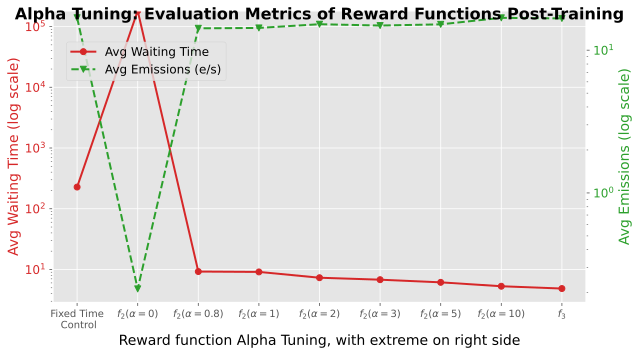

In [11]:
import matplotlib.pyplot as plt

# Create a larger figure to improve readability
plt.figure(figsize=(8, 5))
plt.style.use('ggplot')

# Plot the first series with the first y-axis
fig, ax1 = plt.subplots(figsize=(9, 5))
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

# Plot the first series (avg waiting time) with a logarithmic y-axis
ax1.plot(df_system_wide_whole_numbers.index, df_system_wide_whole_numbers['sys_avg_waiting_time_episode_mean'], 
         color='tab:red', label='Avg Waiting Time', linewidth=2, linestyle='-', marker='o')
ax1.set_xlabel('Reward function Alpha Tuning, with extreme on right side', fontsize=14)
ax1.set_ylabel('Avg Waiting Time (log scale)', fontsize=14, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.grid(True)
ax1.set_yscale('log')

# Plot the second series (absolute acceleration) on a second y-axis with a logarithmic scale
ax2 = ax1.twinx()
ax2.plot(df_system_wide_whole_numbers.index, df_system_wide_whole_numbers['sys_abs_accel_episode_mean'], 
         color='tab:green', label='Avg Emissions (e/s)', linewidth=2, linestyle='--', marker='v')
ax2.set_ylabel('Avg Emissions (log scale)', fontsize=14, color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green', labelsize=12)
ax2.grid(False)  # Avoid double grid lines
ax2.set_yscale('log')

new_labels = [
    'Fixed Time\n Control',
    r'$f_2(\alpha=0)$',
    r'$f_2(\alpha=0.8)$',
    r'$f_2(\alpha=1)$',
    r'$f_2(\alpha=2)$',
    r'$f_2(\alpha=3)$',
    r'$f_2(\alpha=5)$',
    r'$f_2(\alpha=10)$',
    '$f_3$'
]
ax1.set_xticks(range(len(df_system_wide_whole_numbers.index)))
ax1.set_xticklabels(new_labels, fontsize=10)

# Adding legends to the plots
fig.tight_layout()
fig.suptitle('Alpha Tuning: Evaluation Metrics of Reward Functions Post-Training', fontsize=16, fontweight='bold')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9), fontsize=12)

# Adjust y-axis limits to make sure all data points are visible
ax1.set_ylim(0, df_system_wide_whole_numbers['sys_avg_waiting_time_episode_mean'].max() + 2)
ax2.set_ylim(0, df_system_wide_whole_numbers['sys_abs_accel_episode_mean'].max() + 2)

# Show the plot
plt.show()

## Graph with alpha = 0.8

<Figure size 900x500 with 0 Axes>

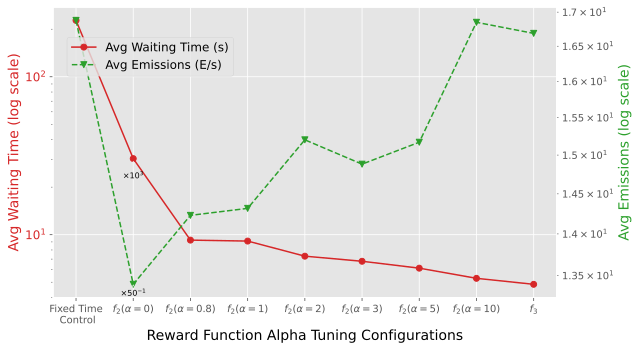

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Create a copy of the dataframe to manipulate the values for plotting
df_plot = df_system_wide_whole_numbers.copy()

# Apply specific transformations for alpha = 0
df_plot.at['alpha_0', 'sys_avg_waiting_time_episode_mean'] /= 6000  # Scale down by dividing by 1000
df_plot.at['alpha_0', 'sys_abs_accel_episode_mean'] *= 63       # Scale up by multiplying by 50

# Create a larger figure to improve readability
plt.figure(figsize=(9, 5))
plt.style.use('ggplot')

# Plot the first series with the first y-axis
fig, ax1 = plt.subplots(figsize=(9, 5))
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

# Plot the first series (avg waiting time) with a logarithmic y-axis
ax1.plot(df_plot.index, df_plot['sys_avg_waiting_time_episode_mean'], 
         color='tab:red', label='Avg Waiting Time (s)', linewidth=1.5, linestyle='-', marker='o')
ax1.set_xlabel('Reward Function Alpha Tuning Configurations', fontsize=14)
ax1.set_ylabel('Avg Waiting Time (log scale)', fontsize=14, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.grid(True)
ax1.set_yscale('log')

# Annotate the scaled value for alpha = 0 for Avg Waiting Time
scaled_waiting_value = df_plot.at['alpha_0', 'sys_avg_waiting_time_episode_mean']
ax1.annotate(r'$\times 10^3$', fontsize=8,
             xy=('alpha_0', scaled_waiting_value),
             xytext=('alpha_0', scaled_waiting_value*0.75),  # Adjust the position of the annotation
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='center')

# Plot the second series (absolute acceleration) on a second y-axis with a logarithmic scale
ax2 = ax1.twinx()
ax2.plot(df_plot.index, df_plot['sys_abs_accel_episode_mean'], 
         color='tab:green', label='Avg Emissions (E/s)', linewidth=1.5, linestyle='--', marker='v')
ax2.set_ylabel('Avg Emissions (log scale)', fontsize=14, color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green', labelsize=12)
ax2.grid(False)  # Avoid double grid lines
ax2.set_yscale('log')

# Annotate the scaled value for alpha = 0 for Avg Emissions
scaled_emissions_value = df_plot.at['alpha_0', 'sys_abs_accel_episode_mean']
ax2.annotate(r'$\times 50^{-1}$', fontsize=8,
             xy=('alpha_0', scaled_emissions_value),
             xytext=('alpha_0', scaled_emissions_value*0.99),  # Adjust the position of the annotation
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='center')

# Change x-axis labels to include alpha sign and expressions
new_labels = [
    'Fixed Time\n Control',
    r'$f_2(\alpha=0)$',
    r'$f_2(\alpha=0.8)$',
    r'$f_2(\alpha=1)$',
    r'$f_2(\alpha=2)$',
    r'$f_2(\alpha=3)$',
    r'$f_2(\alpha=5)$',
    r'$f_2(\alpha=10)$',
    '$f_3$'
]
ax1.set_xticks(range(len(df_plot.index)))
ax1.set_xticklabels(new_labels, fontsize=10)

# Adding legends to the plots
fig.tight_layout()
# fig.suptitle('Alpha Tuning: Evaluation Metrics of Reward Functions Post-Training', fontsize=16, fontweight='bold')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9), fontsize=12)

# Show the plot
plt.show()

'Alpha Tuning: Evaluation Metrics of Reward Functions Post-Training'

## Keep only whole numbers on x axis for consistency! 

<Figure size 900x500 with 0 Axes>

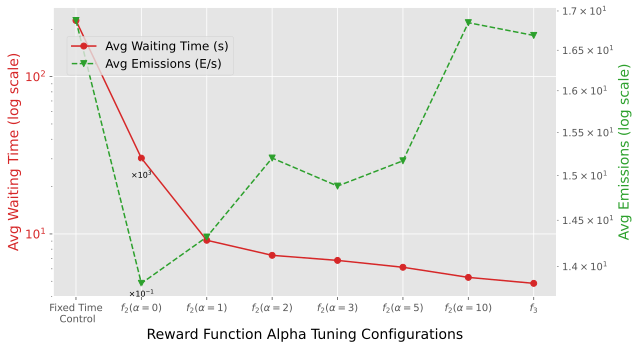

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Create a copy of the dataframe to manipulate the values for plotting
df_plot = df_system_wide_whole_numbers.copy()

# Apply specific transformations for alpha = 0
df_plot.at['alpha_0', 'sys_avg_waiting_time_episode_mean'] /= 6000  # Scale down by dividing by 1000
df_plot.at['alpha_0', 'sys_abs_accel_episode_mean'] *= 65    # Scale up by multiplying by 50

df_plot.drop(['alpha_0_9'], inplace=True)

# Create a larger figure to improve readability
plt.figure(figsize=(9, 5))
plt.style.use('ggplot')

# Plot the first series with the first y-axis
fig, ax1 = plt.subplots(figsize=(9, 5))
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

# Plot the first series (avg waiting time) with a logarithmic y-axis
ax1.plot(df_plot.index, df_plot['sys_avg_waiting_time_episode_mean'], 
         color='tab:red', label='Avg Waiting Time (s)', linewidth=1.5, linestyle='-', marker='o')
ax1.set_xlabel('Reward Function Alpha Tuning Configurations', fontsize=14)
ax1.set_ylabel('Avg Waiting Time (log scale)', fontsize=14, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.grid(True)
ax1.set_yscale('log')

# Annotate the scaled value for alpha = 0 for Avg Waiting Time
scaled_waiting_value = df_plot.at['alpha_0', 'sys_avg_waiting_time_episode_mean']
ax1.annotate(r'$\times 10^3$', fontsize=8,
             xy=('alpha_0', scaled_waiting_value),
             xytext=('alpha_0', scaled_waiting_value*0.75),  # Adjust the position of the annotation
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='center')

# Plot the second series (absolute acceleration) on a second y-axis with a logarithmic scale
ax2 = ax1.twinx()
ax2.plot(df_plot.index, df_plot['sys_abs_accel_episode_mean'], 
         color='tab:green', label='Avg Emissions (E/s)', linewidth=1.5, linestyle='--', marker='v')
ax2.set_ylabel('Avg Emissions (log scale)', fontsize=14, color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green', labelsize=12)
ax2.grid(False)  # Avoid double grid lines
ax2.set_yscale('log')

# Annotate the scaled value for alpha = 0 for Avg Emissions
scaled_emissions_value = df_plot.at['alpha_0', 'sys_abs_accel_episode_mean']
ax2.annotate(r'$\times 10^{-1}$', fontsize=8,
             xy=('alpha_0', scaled_emissions_value),
             xytext=('alpha_0', scaled_emissions_value*0.99),  # Adjust the position of the annotation
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='center')

# Change x-axis labels to include alpha sign and expressions
new_labels = [
    'Fixed Time\n Control',
    r'$f_2(\alpha=0)$',
    r'$f_2(\alpha=1)$',
    r'$f_2(\alpha=2)$',
    r'$f_2(\alpha=3)$',
    r'$f_2(\alpha=5)$',
    r'$f_2(\alpha=10)$',
    '$f_3$'
]
ax1.set_xticks(range(len(df_plot.index)))
ax1.set_xticklabels(new_labels, fontsize=10)

# Adding legends to the plots
fig.tight_layout()
# fig.suptitle('Alpha Tuning: Evaluation Metrics of Reward Functions Post-Training', fontsize=16, fontweight='bold')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9), fontsize=12)

# Show the plot
plt.show()

## Total loss curves for all alpha coefficients.  
ray/tune/info/learner/__all__/total_loss


## Agent wide metrics

In [14]:
df_agent_metrics = df_average_whole_experiment_ordered[
                            ["1_abs_accel_mean",
                             '1_abs_accel_sum',
                             "1_accumulated_waiting_time_mean",

                             '2_abs_accel_mean',
                             '2_abs_accel_sum', 
                             "2_accumulated_waiting_time_mean",

                             '5_abs_accel_mean', 
                             '5_abs_accel_sum',
                             "5_accumulated_waiting_time_mean",

                             '6_abs_accel_mean', 
                             '6_abs_accel_sum',
                             "6_accumulated_waiting_time_mean"]]
df_agent_metrics

,1_abs_accel_mean,1_abs_accel_sum,1_accumulated_waiting_time_mean,2_abs_accel_mean,2_abs_accel_sum,2_accumulated_waiting_time_mean,5_abs_accel_mean,5_abs_accel_sum,5_accumulated_waiting_time_mean,6_abs_accel_mean,6_abs_accel_sum,6_accumulated_waiting_time_mean
alpha_0,0.105516,527.581290,33414.56000,0.053358,266.791448,16705.12000,0.053153,265.765307,16639.80000,0.000000,0.000000,0.00000
alpha_0_6,0.638240,3191.199015,16609.71822,0.525687,2628.435987,-1.30714,0.591007,2955.036451,16639.80128,0.513893,2569.465045,0.00104
alpha_0_65,0.562318,2811.588977,16692.12110,0.509917,2549.584474,0.00000,2.321880,11609.399084,3.32852,2.333735,11668.677273,2.47518
alpha_0_7,5.940584,29702.918651,1099.48436,1.989236,9946.180752,1.99324,2.326287,11631.436892,2.99182,2.323613,11618.063839,2.37974
alpha_0_75,2.419086,12095.431310,3.55070,2.360381,11801.904737,2.26472,2.395851,11979.254146,2.50036,2.305183,11525.916229,1.80944
alpha_0_8,2.481054,12405.269981,3.48508,2.402589,12012.946810,2.39304,2.419250,12096.250778,2.48808,2.346020,11730.101005,1.84964
alpha_0_9,2.379533,11897.665929,3.21970,2.354611,11773.057182,2.69752,2.370825,11854.122763,2.31218,2.277847,11389.236877,2.05916
alpha_1,2.372947,11864.732641,3.58594,2.380777,11903.885354,2.44788,2.413197,12065.982596,2.26092,2.274929,11374.644871,1.86896
alpha_1_1,2.369993,11849.962835,3.40882,2.401050,12005.251565,2.37810,2.397890,11989.447941,2.08280,2.371823,11859.113287,1.87766
alpha_1_5,2.350484,11752.417587,3.06170,2.441901,12209.506386,2.14286,2.406064,12030.321569,2.08556,2.362299,11811.497396,1.58432


In [15]:
45700 / 230, 230 / 191

(198.69565217391303, 1.2041884816753927)

When accumulated waiting time exceeds that of fixed time control baseline, we penalise 

## Training Curves for every agent

In [75]:
# get reward functions values for all training: 
from tensorflow.python.summary.summary_iterator import summary_iterator
import tensorflow as tf

In [76]:
log_file_alpha_0 = "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/TRAINING/PPO_2024-05-16_09_54__alpha_0_from_2x2_diff_acc/PPO_2024-05-16_09_54__alpha_0/PPO_2x2grid_2024-05-16_09_54_eb8b3_00000_0_2024-05-16_09-54-35/events.out.tfevents.1715849689.MacBook-Pro-2"
log_file_delta_wait = "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/TRAINING/PPO_2024-05-18_19_58__delta_wait_time_reward_capped/PPO_2024-05-18_19_58__delta_wait_time_reward_capped/PPO_2x2grid_with_wait_capped_2024-05-18_19_58_91c81_00000_0_2024-05-18_19-58-09/events.out.tfevents.1716058705.MacBook-Pro-2"

tf_file_alpha_1 = "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/TRAINING/PPO_2024-05-17_21_00__alpha_1/PPO_2024-05-17_21_00__alpha_1/PPO_2x2grid_with_wait_capped_2024-05-17_21_00_2f485_00000_0_2024-05-17_21-01-01/events.out.tfevents.1715976076.MacBook-Pro-2"
tf_file_alpha_2 = 'reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/TRAINING/PPO_2024-05-18_17_19__alpha_2/PPO_2024-05-18_17_19__alpha_2/PPO_2x2grid_with_wait_capped_2024-05-18_17_19_5b7c4_00000_0_2024-05-18_17-19-09/events.out.tfevents.1716049165.MacBook-Pro-2'
tf_file_alpha_3 = "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/TRAINING/PPO_2024-05-18_20_46__alpha_3/PPO_2024-05-18_20_46__alpha_3/PPO_2x2grid_with_wait_capped_2024-05-18_20_46_4c2ba_00000_0_2024-05-18_20-46-19/events.out.tfevents.1716061595.MacBook-Pro-2"
tf_file_alpha_5 = "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/TRAINING/PPO_2024-05-18_23_01__alpha_5/PPO_2024-05-18_23_01__alpha_5/PPO_2x2grid_with_wait_capped_2024-05-18_23_01_3be14_00000_0_2024-05-18_23-01-52/events.out.tfevents.1716069727.MacBook-Pro-2"
tf_file_alpha_10 = "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/TRAINING/PPO_2024-05-20_09_18__alpha_10/PPO_2024-05-20_09_18__alpha_10/PPO_2x2grid_with_wait_capped_2024-05-20_09_18_8b92a_00000_0_2024-05-20_09-18-32/events.out.tfevents.1716193129.MacBook-Pro-2"

log_files = [log_file_delta_wait, 
             log_file_alpha_0,
             tf_file_alpha_1,
             tf_file_alpha_2,
             tf_file_alpha_3,
             tf_file_alpha_5,
             tf_file_alpha_10
             ]

log_files_abs = [os.path.join("/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean", x) for x in log_files]

In [77]:
def get_total_loss_from_log_file(log_file):
    tag = 'ray/tune/info/learner/__all__/total_loss'

    col_name = log_file.split('/')[-3]

    total_loss_series_dict = []

    for summary in summary_iterator(log_file):
        for value in summary.summary.value:
            if value.tag == tag:
                total_loss_series_dict.append(value.simple_value)
    
    total_loss_series_dict_df = pd.DataFrame(total_loss_series_dict, columns=[col_name])
    
    return total_loss_series_dict_df 


In [78]:
concat_df = pd.concat([get_total_loss_from_log_file(file) for file in log_files_abs], axis=1)

In [79]:
concat_df.columns

Index(['PPO_2024-05-18_19_58__delta_wait_time_reward_capped', 'PPO_2024-05-16_09_54__alpha_0', 'PPO_2024-05-17_21_00__alpha_1', 'PPO_2024-05-18_17_19__alpha_2', 'PPO_2024-05-18_20_46__alpha_3', 'PPO_2024-05-18_23_01__alpha_5', 'PPO_2024-05-20_09_18__alpha_10'], dtype='object')

<Figure size 1500x800 with 0 Axes>

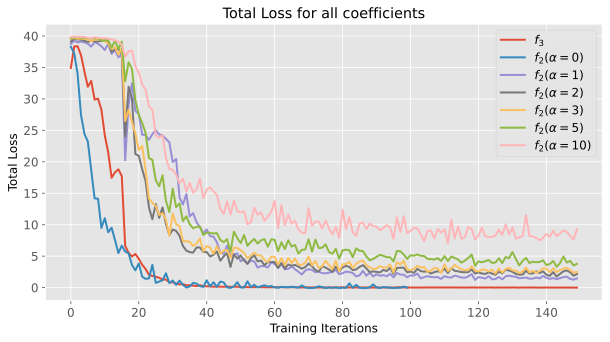

In [80]:
plt.figure(figsize=(15, 8))

xlim = 250
line_width = 2

# Plot each series with distinct styles
concat_df.plot(label='Capped', linewidth=line_width, figsize=(10, 5))
# , label='Capped', linewidth=line_width, color='green')

# axs[0].set_title('Policy 1', fontsize=14, fontweight='bold')
# plt.legend(title='Policy 1', title_fontsize='12', fontsize='12', loc='best')

new_labels = [
    '$f_3$',
    r'$f_2(\alpha=0)$',
    r'$f_2(\alpha=1)$',
    r'$f_2(\alpha=2)$',
    r'$f_2(\alpha=3)$',
    r'$f_2(\alpha=5)$',
    r'$f_2(\alpha=10)$',
]

plt.legend(new_labels, fontsize='12', loc='best')
plt.xlabel('Training Iterations', fontsize=12)
plt.ylabel('Total Loss', fontsize=12)
plt.grid(True, 'both')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title("Total Loss for all coefficients")
plt.show()

In [135]:
def get_vf_loss_from_log_file_and_agent(log_file, agent_id):
    tag = "ray/tune/info/learner/"+str(agent_id)+"/vf_loss"
    col_name = log_file.split('/')[-3]

    vf_loss_series_dict = []

    for summary in summary_iterator(log_file):
        for value in summary.summary.value:
            if value.tag == tag:
                vf_loss_series_dict.append(value.simple_value)
    
    total_loss_series_dict_df = pd.DataFrame(vf_loss_series_dict, columns=[col_name])
    
    return total_loss_series_dict_df 

def get_vf_loss_from_log_file(log_file):
    labels = ["ray/tune/info/learner/1/vf_loss", 
              "ray/tune/info/learner/2/vf_loss", 
              "ray/tune/info/learner/5/vf_loss", 
              "ray/tune/info/learner/6/vf_loss"]

    vf_loss_series_dict = {f"vf_loss_{agent_id}" : [] for agent_id in [1, 2, 5, 6]}

    for summary in summary_iterator(log_file):
        for value in summary.summary.value:
            if value.tag in labels:
                tag = value.tag
                agent_id = tag.split('/')[-2]
                col_name = f"vf_loss_{agent_id}"
                vf_loss_series_dict[col_name].append(value.simple_value)

    vf_loss_series_dict_df = pd.DataFrame(vf_loss_series_dict)
    
    return vf_loss_series_dict_df 

In [148]:
vf_losses_agent_1 = pd.concat([get_vf_loss_from_log_file_and_agent(file, 1) for file in log_files_abs], axis=1)
vf_losses_agent_2 = pd.concat([get_vf_loss_from_log_file_and_agent(file, 2) for file in log_files_abs], axis=1)
vf_losses_agent_5 = pd.concat([get_vf_loss_from_log_file_and_agent(file, 5) for file in log_files_abs], axis=1)
vf_losses_agent_6 = pd.concat([get_vf_loss_from_log_file_and_agent(file, 6) for file in log_files_abs], axis=1)

In [149]:
vf_losses_agent_1.columns

Index(['PPO_2024-05-18_19_58__delta_wait_time_reward_capped', 'PPO_2024-05-16_09_54__alpha_0', 'PPO_2024-05-17_21_00__alpha_1', 'PPO_2024-05-18_17_19__alpha_2', 'PPO_2024-05-18_20_46__alpha_3', 'PPO_2024-05-18_23_01__alpha_5', 'PPO_2024-05-20_09_18__alpha_10'], dtype='object')

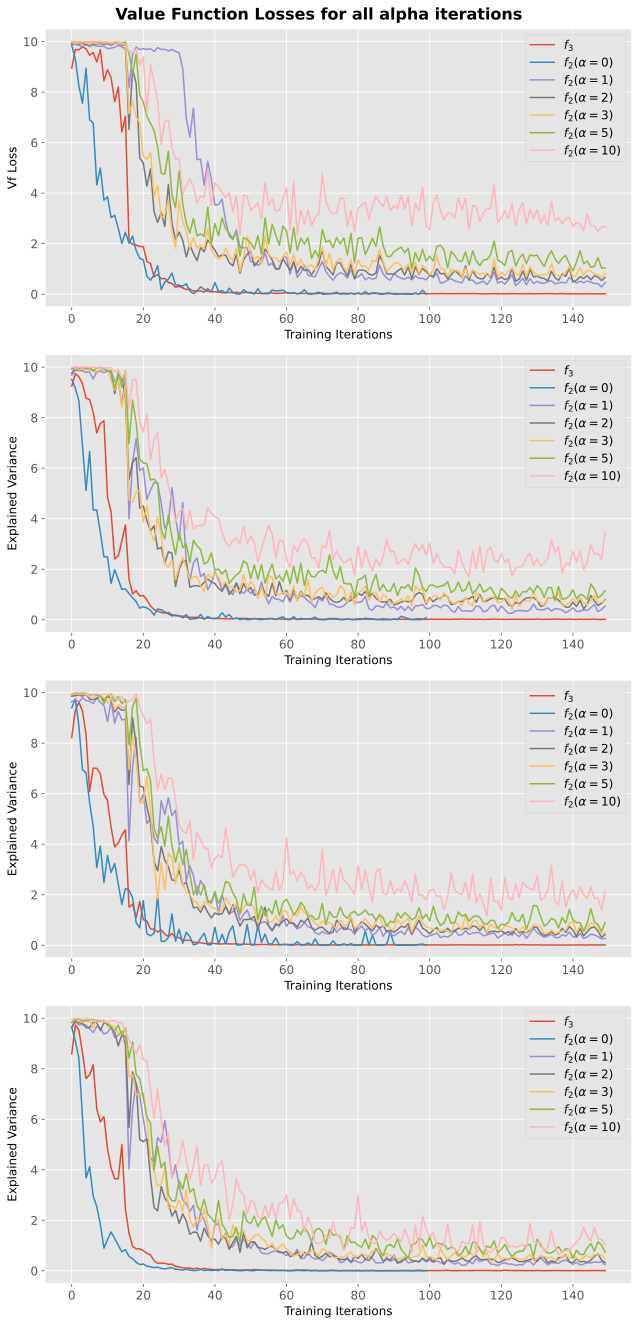

In [153]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 1, figsize=(9, 20))

xlim = 250
line_width = 1.5
new_labels = [
    '$f_3$',
    r'$f_2(\alpha=0)$',
    r'$f_2(\alpha=1)$',
    r'$f_2(\alpha=2)$',
    r'$f_2(\alpha=3)$',
    r'$f_2(\alpha=5)$',
    r'$f_2(\alpha=10)$',
]

# Plot each series with distinct styles
axs[0].plot(vf_losses_agent_1, label=new_labels, linewidth=line_width)
# axs[0].set_title('Policy 1', fontsize=14, fontweight='bold')
axs[0].legend(fontsize='12', loc='best')
axs[0].set_xlabel('Training Iterations', fontsize=12)
axs[0].set_ylabel('Vf Loss', fontsize=12)
axs[0].grid(True)
axs[0].tick_params(axis='both', which='major', labelsize=12)

# Plot each series with distinct styles
axs[1].plot(vf_losses_agent_2, label=new_labels, linewidth=line_width)
# axs[0].set_title('Policy 1', fontsize=14, fontweight='bold')
axs[1].legend(fontsize='12', loc='best')
axs[1].set_xlabel('Training Iterations', fontsize=12)
axs[1].set_ylabel('Explained Variance', fontsize=12)
axs[1].grid(True)
axs[1].tick_params(axis='both', which='major', labelsize=12)

# Plot each series with distinct styles
axs[2].plot(vf_losses_agent_5, label=new_labels, linewidth=line_width)
# axs[0].set_title('Policy 1', fontsize=14, fontweight='bold')
axs[2].legend(fontsize='12', loc='best')
axs[2].set_xlabel('Training Iterations', fontsize=12)
axs[2].set_ylabel('Explained Variance', fontsize=12)
axs[2].grid(True)
axs[2].tick_params(axis='both', which='major', labelsize=12)

# Plot each series with distinct styles
axs[3].plot(vf_losses_agent_6, label=new_labels, linewidth=line_width)
# axs[0].set_title('Policy 1', fontsize=14, fontweight='bold')
axs[3].legend(fontsize='12', loc='best')
axs[3].set_xlabel('Training Iterations', fontsize=12)
axs[3].set_ylabel('Explained Variance', fontsize=12)
axs[3].grid(True)
axs[3].tick_params(axis='both', which='major', labelsize=12)

# Set the overall title for the figure
fig.suptitle('Value Function Losses for all alpha iterations', fontsize=16, fontweight='bold', y=0.92)

# Set the style of the plot
plt.style.use('ggplot')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.93])

# Show the plot
plt.show()

In [157]:
vf_loss_tot = vf_losses_agent_1 + vf_losses_agent_2 + vf_losses_agent_5 + vf_losses_agent_6


<Figure size 1500x800 with 0 Axes>

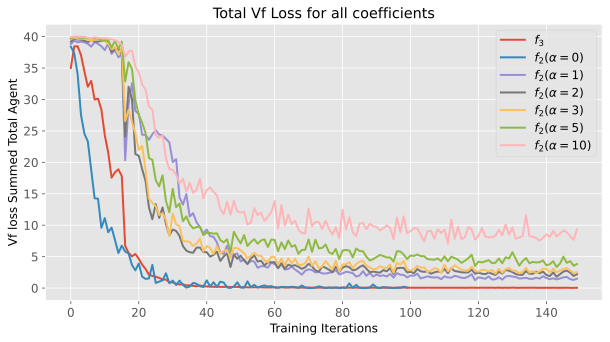

In [161]:
plt.figure(figsize=(15, 8))

xlim = 250
line_width = 2

# Plot each series with distinct styles
vf_loss_tot.plot(label='Capped', linewidth=line_width, figsize=(10, 5))
# , label='Capped', linewidth=line_width, color='green')

# axs[0].set_title('Policy 1', fontsize=14, fontweight='bold')
# plt.legend(title='Policy 1', title_fontsize='12', fontsize='12', loc='best')

new_labels = [
    '$f_3$',
    r'$f_2(\alpha=0)$',
    r'$f_2(\alpha=1)$',
    r'$f_2(\alpha=2)$',
    r'$f_2(\alpha=3)$',
    r'$f_2(\alpha=5)$',
    r'$f_2(\alpha=10)$',
]

plt.legend(new_labels, fontsize='12', loc='best')
plt.xlabel('Training Iterations', fontsize=12)
plt.ylabel('Vf loss Summed Total Agent', fontsize=12)
plt.grid(True, 'both')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title("Total Vf Loss for all coefficients")
plt.show()

## Policy reward - episode reward ? 

In [151]:
x = ["ray/tune/policy_reward_mean/1",
    "ray/tune/policy_reward_mean/2", 
    "ray/tune/policy_reward_mean/5",
    "ray/tune/policy_reward_mean/6"] 

policy_reward_dict = {tag:0 for tag in x}

policy_reward_series_dict = {tag:[] for tag in x}

for summary in summary_iterator(log_file_alpha_0):
    for value in summary.summary.value:
        print(value.tag)
        # if value.tag in x:
        #     policy_reward_dict[value.tag] = value.simple_value
        #     policy_reward_series_dict[value.tag].append(value.simple_value)

NotFoundError: reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/TRAINING/PPO_2024-05-16_09_54__alpha_0_from_2x2_diff_acc/PPO_2024-05-16_09_54__alpha_0/PPO_2x2grid_2024-05-16_09_54_eb8b3_00000_0_2024-05-16_09-54-35/events.out.tfevents.1715849689.MacBook-Pro-2; No such file or directory

In [ ]:
def get_policy_reward_dict_mean_values(log_file):
    x = ["ray/tune/policy_reward_mean/1",
        "ray/tune/policy_reward_mean/2", 
        "ray/tune/policy_reward_mean/5",
        "ray/tune/policy_reward_mean/6"] 

    policy_reward_dict = {tag:0 for tag in x}

    policy_reward_series_dict = {tag:[] for tag in x}

    for summary in summary_iterator(os.path.abspath(log_file)):
        for value in summary.summary.value:
            if value.tag in x:
                policy_reward_dict[value.tag] = value.simple_value
                policy_reward_series_dict[value.tag].append(value.simple_value)
    
    return policy_reward_series_dict 

In [ ]:
log_file_alpha_0 = "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/TRAINING/PPO_2024-05-16_09_54__alpha_0_from_2x2_diff_acc/PPO_2024-05-16_09_54__alpha_0/PPO_2x2grid_2024-05-16_09_54_eb8b3_00000_0_2024-05-16_09-54-35/events.out.tfevents.1715849689.MacBook-Pro-2"
log_file_alpha_0 = os.path.join("/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean", log_file_alpha_0)

log_file_diff_wait = "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/TRAINING/PPO_2024-05-18_19_58__delta_wait_time_reward_capped/PPO_2024-05-18_19_58__delta_wait_time_reward_capped/PPO_2x2grid_with_wait_capped_2024-05-18_19_58_91c81_00000_0_2024-05-18_19-58-09/events.out.tfevents.1716058705.MacBook-Pro-2"
log_file_diff_wait = os.path.join("/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean", log_file_diff_wait)

/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_5424/37480279.py:34: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


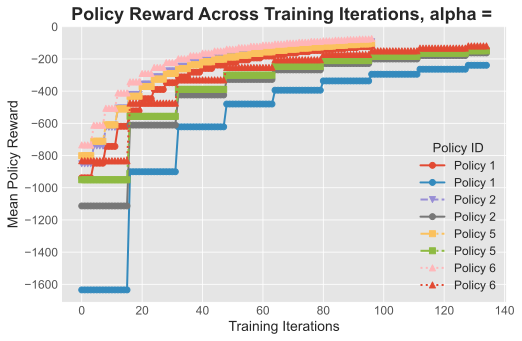

In [ ]:
import matplotlib.pyplot as plt

# Create a larger figure to improve readability
plt.figure(figsize=(8, 5))
plt.style.use('ggplot')

%config InlineBackend.figure_format = 'svg'

policy_reward_series_dict_alpha_0 = get_policy_reward_dict_mean_values(log_file_alpha_0)
policy_reward_series_dict_diff_wait = get_policy_reward_dict_mean_values(log_file_diff_wait)


# Plot each series with distinct styles
plt.plot(policy_reward_series_dict_alpha_0["ray/tune/policy_reward_mean/1"], label='Policy 1', linewidth=2, linestyle='-', marker='o')
plt.plot(policy_reward_series_dict_diff_wait["ray/tune/policy_reward_mean/1"], label='Policy 1', linewidth=2, linestyle='-', marker='o')

plt.plot(policy_reward_series_dict_alpha_0["ray/tune/policy_reward_mean/2"], label='Policy 2', linewidth=2, linestyle='--', marker='v')
plt.plot(policy_reward_series_dict_diff_wait["ray/tune/policy_reward_mean/2"], label='Policy 2', linewidth=2, linestyle='-', marker='o')

plt.plot(policy_reward_series_dict_alpha_0["ray/tune/policy_reward_mean/5"], label='Policy 5', linewidth=2, linestyle='-.', marker='s')
plt.plot(policy_reward_series_dict_diff_wait["ray/tune/policy_reward_mean/5"], label='Policy 5', linewidth=2, linestyle='-.', marker='s')

plt.plot(policy_reward_series_dict_alpha_0["ray/tune/policy_reward_mean/6"], label='Policy 6', linewidth=2, linestyle=':', marker='^')
plt.plot(policy_reward_series_dict_diff_wait["ray/tune/policy_reward_mean/6"], label='Policy 6', linewidth=2, linestyle=':', marker='^')

# Improve the aesthetics
plt.title('Policy Reward Across Training Iterations, alpha = ', fontsize=18, fontweight='bold')
plt.xlabel('Training Iterations', fontsize=14)
plt.ylabel('Mean Policy Reward', fontsize=14)
plt.legend(title='Policy ID', title_fontsize='13', fontsize='12', loc='best')
plt.grid(True)

# Set the style of the plot
plt.style.use('seaborn-darkgrid')

# Adjust tick params
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

In [ ]:
log_file = "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/TRAINING/PPO_2024-05-17_12_05__alpha_0.6/PPO_2024-05-17_12_05__alpha_0.6/PPO_2x2grid_with_wait_capped_2024-05-17_12_05_5c89a_00000_0_2024-05-17_12-05-25/events.out.tfevents.1715943947.MacBook-Pro-2"
log_file = os.path.join("/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean", log_file)

policy_reward_series_dict = get_policy_reward_dict_mean_values(log_file)


## Columns of interest to place in report:

In [ ]:
df_subset = df_average_whole_experiment_ordered[['sys_abs_accel_episode_sum', 
                             'sys_avg_waiting_time_episode_mean',
                             "sys_total_stopped_episode_mean",
                             "sys_avg_speed_episode_mean",
                             "tot_agent_stopped_episode_mean",
                             "tot_agent_stopped_episode_sum",
                             "tot_agent_accum_wait_time",
                             "all_agents_abs_accel_episode_mean"]]

df_subset = df_average_whole_experiment_ordered[['sys_', 
                                                 "sys_total_stopped_episode_mean"]]
df_subset


KeyError: "['sys_'] not in index"

In [ ]:
print(df_subset.to_latex())

\begin{tabular}{lrr}
\toprule
 & tot_agent_stopped_episode_mean & sys_total_stopped_episode_mean \\
\midrule
alpha_0 & 74.351900 & 74.351900 \\
alpha_0_6 & 37.219280 & 37.219280 \\
alpha_0_65 & 19.424400 & 19.424400 \\
alpha_0_7 & 12.469200 & 12.469200 \\
alpha_0_75 & 1.497500 & 1.497500 \\
alpha_0_8 & 1.528480 & 1.528480 \\
alpha_0_9 & 1.492640 & 1.492640 \\
alpha_1 & 1.493440 & 1.493440 \\
alpha_1_1 & 1.470720 & 1.470720 \\
alpha_1_5 & 1.396140 & 1.396140 \\
alpha_2 & 1.415280 & 1.415280 \\
alpha_3 & 1.322960 & 1.322960 \\
alpha_5 & 1.287240 & 1.287240 \\
alpha_10 & 1.271340 & 1.271340 \\
trained_delta_wait_time & 1.202680 & 1.202680 \\
fixed_tc & 11.046080 & 11.046080 \\
\bottomrule
\end{tabular}



## Inspecting Reward Fn before and after Capping

In [ ]:
import os
import sys 
sys.path.append("../")
from data_analysis_functions import generate_summary_df_from_csv, get_df_from_csv
import matplotlib.pyplot as plt

In [ ]:
diff_accum_wait_path = "reward_measuring_experiment/2x2grid/combined_reward_function_factory_with_diff_accum_wait_time"
diff_accum_wait_normalised = "reward_measuring_experiment/2x2grid/combined_reward_function_factory_with_diff_accum_wait_time_normalised_for_resco_train"
diff_accum_wait_capped_path = "reward_measuring_experiment/2x2grid/combined_reward_function_factory_with_diff_accum_wait_time_capped"

paths = [diff_accum_wait_path, diff_accum_wait_normalised, diff_accum_wait_capped_path]

In [ ]:
abs_paths = [os.path.join("/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean/", x) for x in paths]

In [ ]:
import pandas as pd
seeds_to_group_join = [39, 83]
diff_accum_wait_reward_df = pd.concat([get_df_from_csv(abs_paths[0], eval_dir="fixed_tc", csv_file_name="extra_metrics.csv", seed=seed)
                     for seed in seeds_to_group_join ], axis=1)

diff_accum_wait_normalised_reward_df = pd.concat([get_df_from_csv(abs_paths[1], eval_dir="fixed_tc", csv_file_name="extra_metrics.csv", seed=seed)
                     for seed in seeds_to_group_join ], axis=1)

diff_accum_wait_capped_reward_df = pd.concat([get_df_from_csv(abs_paths[2], eval_dir="fixed_tc", csv_file_name="extra_metrics.csv", seed=seed)
                     for seed in seeds_to_group_join ], axis=1)

In [ ]:
diff_accum_wait_reward_grouped = diff_accum_wait_reward_df.groupby(
                                                by=diff_accum_wait_reward_df.columns, 
                                                axis=1).mean()
diff_accum_wait_normalised_reward_grouped = diff_accum_wait_normalised_reward_df.groupby(
                                                by=diff_accum_wait_normalised_reward_df.columns, 
                                                axis=1).mean()
diff_accum_wait_capped_reward_grouped = diff_accum_wait_capped_reward_df.groupby(
                                                by=diff_accum_wait_capped_reward_df.columns, 
                                                axis=1).mean()

/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_5424/2831884833.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  diff_accum_wait_reward_grouped = diff_accum_wait_reward_df.groupby(
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_5424/2831884833.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  diff_accum_wait_normalised_reward_grouped = diff_accum_wait_normalised_reward_df.groupby(
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_5424/2831884833.py:7: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  diff_accum_wait_capped_reward_grouped = diff_accum_wait_capped_reward_df.groupby(


In [ ]:
diff_accum_wait_reward_grouped.describe()

,env_step_num,reward_1,reward_2,reward_5,reward_6,total_agent_reward
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,-0.179062,-0.156904,-0.144470,-0.112143,-0.592580
std,288.819436,0.270418,0.273072,0.275677,0.244186,0.843842
min,0.000000,-0.736396,-0.892107,-0.868261,-0.643540,-1.955452
25%,249.750000,-0.360691,-0.356283,-0.343791,-0.246968,-1.097837
50%,499.500000,-0.243281,-0.175819,-0.172859,-0.175004,-0.860143
75%,749.250000,-0.059622,-0.036512,-0.036907,-0.088412,-0.432520
max,999.000000,0.648036,0.796143,0.873092,0.945816,2.666159


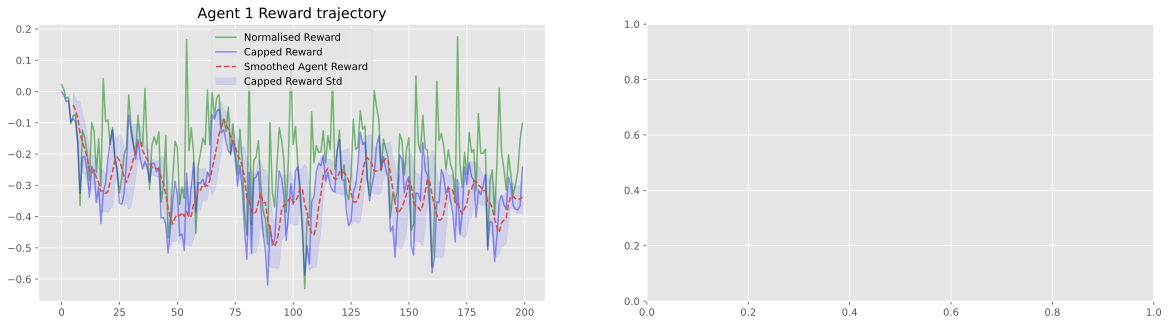

In [ ]:
fig, axis = plt.subplots(1,2,figsize=(20, 5))
xstart=0
xperiod=200
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

# axis[0,0].plot(diff_accum_wait_reward_grouped['reward_1'][xstart:xstart+xperiod], label='reward')
axis[0].plot(diff_accum_wait_normalised_reward_grouped['reward_1'][xstart:xstart+xperiod]-0.8, label='Normalised Reward', color = 'green', alpha=0.5) # we shift this down for visibility during comparison
axis[0].plot(diff_accum_wait_capped_reward_grouped['reward_1'][xstart:xstart+xperiod], label='Capped Reward', color='blue', alpha=0.4)
axis[0].set_title("Agent 1 Reward trajectory")

window_size = 6  # You can adjust the window size based on your data
# axis[0,0].plot(diff_accum_wait_capped_reward_grouped['reward_1'][xstart:xstart+xperiod].rolling(window=window_size).mean(), label='Smoothed Capped Reward', linestyle='--')

axis[0].plot(diff_accum_wait_capped_reward_grouped['reward_1'][xstart:xstart+xperiod].rolling(window=window_size).mean(), label='Smoothed Agent Reward', linestyle='--')

mean_line = diff_accum_wait_capped_reward_grouped['reward_1'][xstart:xstart+xperiod].rolling(window=window_size).mean()
std_dev = diff_accum_wait_capped_reward_grouped['reward_1'][xstart:xstart+xperiod].rolling(window=window_size).std()
axis[0].fill_between(range(xstart, xstart+xperiod), mean_line-std_dev, mean_line+std_dev, color='b', alpha=0.1, label='Capped Reward Std')

axis[0].legend()


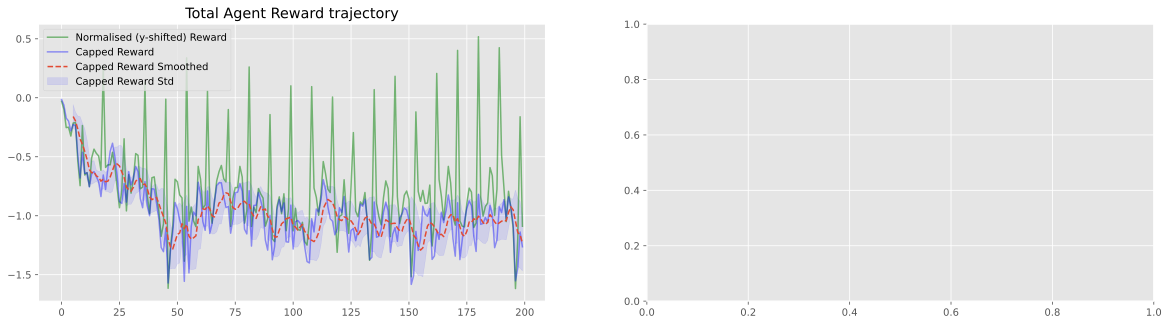

In [ ]:
fig, axis = plt.subplots(1,2,figsize=(20, 5))
xstart=0
xperiod=200
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

# axis[0,0].plot(diff_accum_wait_reward_grouped['reward_1'][xstart:xstart+xperiod], label='reward')
axis[0].plot(diff_accum_wait_normalised_reward_grouped['total_agent_reward'][xstart:xstart+xperiod]-3.3, label='Normalised (y-shifted) Reward', color = 'green', alpha=0.5) # we shift this down for visibility during comparison

axis[0].plot(diff_accum_wait_capped_reward_grouped['total_agent_reward'][xstart:xstart+xperiod], label='Capped Reward', color='blue', alpha=0.4)
axis[0].plot(diff_accum_wait_capped_reward_grouped['total_agent_reward'][xstart:xstart+xperiod].rolling(window=window_size).mean(), label='Capped Reward Smoothed', linestyle='--')

window_size = 6  # You can adjust the window size based on your data
# axis[0,0].plot(diff_accum_wait_capped_reward_grouped['reward_1'][xstart:xstart+xperiod].rolling(window=window_size).mean(), label='Smoothed Capped Reward', linestyle='--')


mean_line = diff_accum_wait_capped_reward_grouped['total_agent_reward'][xstart:xstart+xperiod].rolling(window=window_size).mean()
std_dev = diff_accum_wait_capped_reward_grouped['total_agent_reward'][xstart:xstart+xperiod].rolling(window=window_size).std()
axis[0].fill_between(range(xstart, xstart+xperiod), mean_line-std_dev, mean_line+std_dev, color='b', alpha=0.1, label='Capped Reward Std')

axis[0].set_title("Total Agent Reward trajectory")
axis[0].legend()

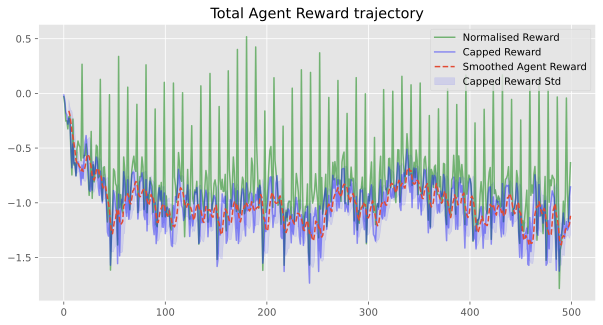

In [ ]:
plt.figure(figsize=(10, 5))
xstart=0
xperiod=500
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

# axis[0,0].plot(diff_accum_wait_reward_grouped['reward_1'][xstart:xstart+xperiod], label='reward')
plt.plot(diff_accum_wait_normalised_reward_grouped['total_agent_reward'][xstart:xstart+xperiod]-3.3, label='Normalised Reward', color = 'green', alpha=0.5) # we shift this down for visibility during comparison

plt.plot(diff_accum_wait_capped_reward_grouped['total_agent_reward'][xstart:xstart+xperiod], label='Capped Reward', color='blue', alpha=0.4)
plt.plot(diff_accum_wait_capped_reward_grouped['total_agent_reward'][xstart:xstart+xperiod].rolling(window=window_size).mean(), label='Smoothed Agent Reward', linestyle='--')

window_size = 6  # You can adjust the window size based on your data
# axis[0,0].plot(diff_accum_wait_capped_reward_grouped['reward_1'][xstart:xstart+xperiod].rolling(window=window_size).mean(), label='Smoothed Capped Reward', linestyle='--')

mean_line = diff_accum_wait_capped_reward_grouped['total_agent_reward'][xstart:xstart+xperiod].rolling(window=window_size).mean()
std_dev = diff_accum_wait_capped_reward_grouped['total_agent_reward'][xstart:xstart+xperiod].rolling(window=window_size).std()
plt.fill_between(range(xstart, xstart+xperiod), mean_line-std_dev, mean_line+std_dev, color='b', alpha=0.1, label='Capped Reward Std')

plt.title("Total Agent Reward trajectory")
plt.legend()
plt.show()

In [ ]:
diff_accum_wait_reward_grouped.diff().std()

env_step_num          0.000000
reward_1              0.307161
reward_2              0.304526
reward_5              0.300941
reward_6              0.317935
total_agent_reward    1.102964
dtype: float64

In [ ]:
import pandas as pd

diff_accum_wait_reward_grouped_tot_agent = diff_accum_wait_reward_grouped['total_agent_reward']
diff_accum_wait_normalised_reward_grouped_tot_agent = diff_accum_wait_normalised_reward_grouped['total_agent_reward']
diff_accum_wait_capped_reward_grouped_tot_agent = diff_accum_wait_capped_reward_grouped['total_agent_reward']

convergence_summary_table = pd.DataFrame(index=['Original', 'Reward Normalised', 'Reward Capped'], columns=[ "Moving Average Convergence", "Std of Difference"])

convergence_summary_table.loc['Original',  "Moving Average Convergence"] = np.mean(
    np.abs(diff_accum_wait_reward_grouped_tot_agent - diff_accum_wait_reward_grouped_tot_agent.rolling(window=10).mean()))
convergence_summary_table.loc['Reward Normalised', "Moving Average Convergence"] = np.mean(
    np.abs(diff_accum_wait_normalised_reward_grouped_tot_agent - diff_accum_wait_normalised_reward_grouped_tot_agent.rolling(window=10).mean()))
convergence_summary_table.loc['Reward Capped', "Moving Average Convergence"] = np.mean(
    np.abs(diff_accum_wait_capped_reward_grouped_tot_agent - diff_accum_wait_capped_reward_grouped_tot_agent.rolling(window=10).mean()))
convergence_summary_table

convergence_summary_table.loc['Original', "Std of Difference"] = np.diff(diff_accum_wait_reward_grouped_tot_agent).std()
convergence_summary_table.loc['Reward Normalised', "Std of Difference"] = np.diff(diff_accum_wait_normalised_reward_grouped_tot_agent).std()
convergence_summary_table.loc['Reward Capped', "Std of Difference"] = np.diff(diff_accum_wait_capped_reward_grouped_tot_agent).std()

convergence_summary_table.loc['Original', "Variance"] = np.sum(np.abs(diff_accum_wait_reward_grouped_tot_agent.diff()))
convergence_summary_table.loc['Reward Normalised', "Variance"] = np.sum(np.abs(diff_accum_wait_normalised_reward_grouped_tot_agent.diff()))
convergence_summary_table.loc['Reward Capped', "Variance"] = np.sum(np.abs(diff_accum_wait_capped_reward_grouped_tot_agent.diff()))

convergence_summary_table

,Moving Average Convergence,Std of Difference,Variance
Original,0.554675,1.102412,643.718370
Reward Normalised,0.243909,0.540007,368.870533
Reward Capped,0.14881,0.214294,170.221922


In [ ]:
convergence_summary_table_of_interest = convergence_summary_table.iloc[1:,:]
convergence_summary_table_of_interest

,Moving Average Convergence,Std of Difference,Variance
Reward Normalised,0.243909,0.540007,368.870533
Reward Capped,0.14881,0.214294,170.221922


In [ ]:
0.243909/0.14881

1.639063234997648

In [ ]:
368.870533/170.221922

2.1669978147702973

In [ ]:
(368.870533 - 170.221922) / 368.870533

0.5385320681063999

## Explained reward for Capped VS Uncapped

In [ ]:
# get reward functions values for all training: 
from tensorflow.python.summary.summary_iterator import summary_iterator
import tensorflow as tf

In [ ]:
uncapped_training_results_tf_file = "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/TRAINING/PPO_2024-05-22_15_16__alpha_1_normalised_uncapped/PPO_2024-05-22_15_16__alpha_1_normalised_uncapped/PPO_2x2grid_with_wait_capped_2024-05-22_15_16_e2348_00000_0_2024-05-22_15-16-29/events.out.tfevents.1716387405.MacBook-Pro-2"
uncapped_training_results_tf_file = os.path.join("/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean", uncapped_training_results_tf_file)

capped_training_results_tf_file = "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/TRAINING/PPO_2024-05-17_21_00__alpha_1/PPO_2024-05-17_21_00__alpha_1/PPO_2x2grid_with_wait_capped_2024-05-17_21_00_2f485_00000_0_2024-05-17_21-01-01/events.out.tfevents.1715976076.MacBook-Pro-2"
capped_training_results_tf_file = os.path.join("/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean", capped_training_results_tf_file)


In [ ]:
def get_explained_var_dict_from_log_file(log_file):
    agent_specific_labels = [
        "ray/tune/info/learner/1/vf_explained_var",
        "ray/tune/info/learner/2/vf_explained_var",
        "ray/tune/info/learner/5/vf_explained_var",
        "ray/tune/info/learner/6/vf_explained_var"]

    explained_variance_dict = {tag:[] for tag in agent_specific_labels}

    for summary in summary_iterator(os.path.abspath(log_file)):
        for value in summary.summary.value:
            if value.tag in agent_specific_labels:
                explained_variance_dict[value.tag].append(value.simple_value)
    return pd.DataFrame(explained_variance_dict)

In [ ]:
import matplotlib.pyplot as plt

# Create a larger figure to improve readability
plt.figure(figsize=(8, 5))
plt.style.use('ggplot')

%config InlineBackend.figure_format = 'svg'

explained_variance_dict_capped = get_explained_var_dict_from_log_file(capped_training_results_tf_file)
explained_variance_dict_uncapped = get_explained_var_dict_from_log_file(uncapped_training_results_tf_file)

<Figure size 800x500 with 0 Axes>

In [ ]:
capped_tot_agent_sum_variance = explained_variance_dict_capped.sum(axis=1)
uncapped_tot_agent_sum_variance = explained_variance_dict_uncapped.sum(axis=1)

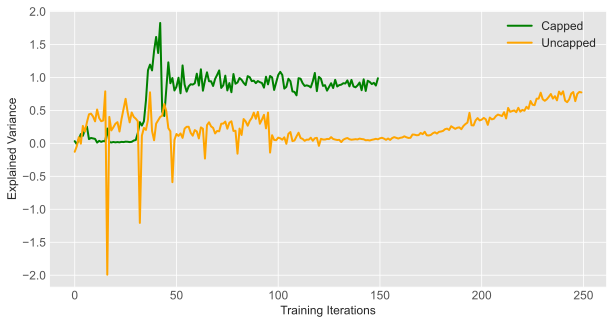

In [ ]:
plt.figure(figsize=(10, 5))

xlim = 250
line_width = 2

# Plot each series with distinct styles
plt.plot(capped_tot_agent_sum_variance, label='Capped', linewidth=line_width, color='green')
plt.plot(uncapped_tot_agent_sum_variance, label='Uncapped', linewidth=line_width, color='orange')

# axs[0].set_title('Policy 1', fontsize=14, fontweight='bold')
# plt.legend(title='Policy 1', title_fontsize='12', fontsize='12', loc='best')
plt.legend(fontsize='12', loc='best')
plt.xlabel('Training Iterations', fontsize=12)
plt.ylabel('Explained Variance', fontsize=12)
plt.grid(True, 'both')
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()


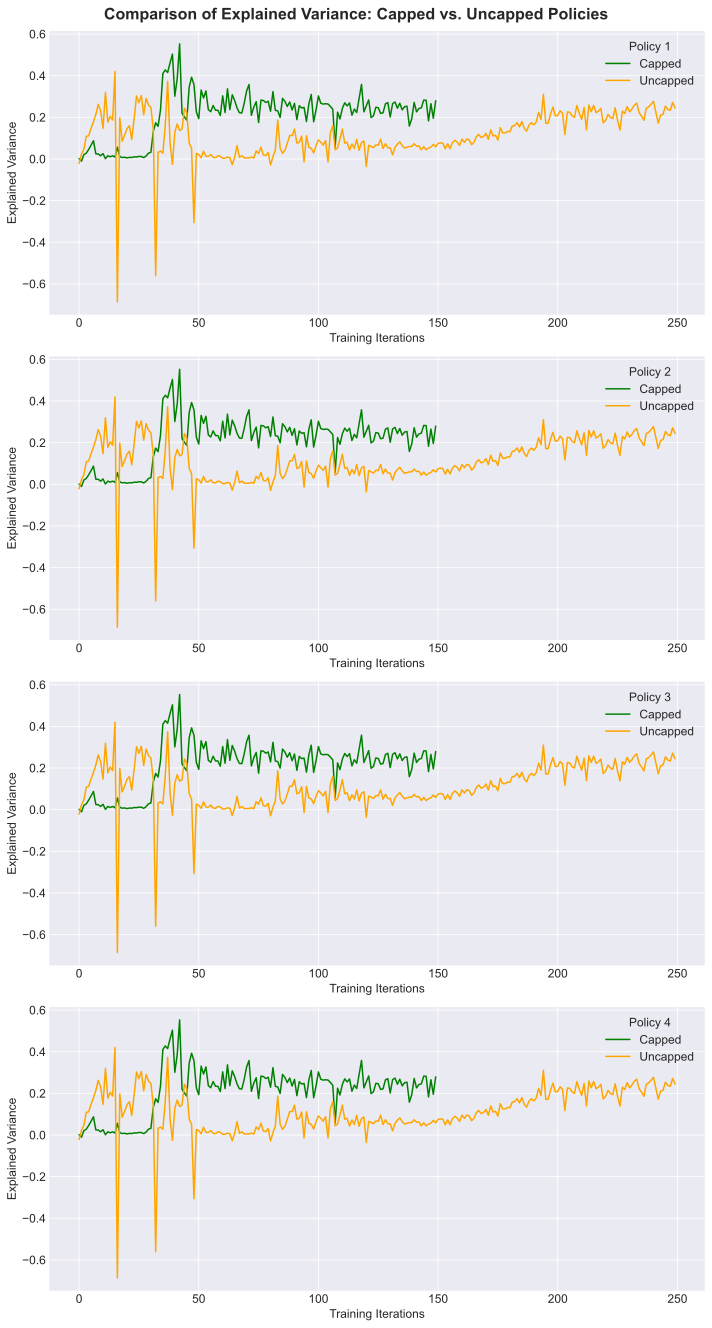

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 1, figsize=(10, 20))

xlim = 250
line_width = 1.5

# Plot each series with distinct styles
axs[0].plot(explained_variance_dict_capped.iloc[:, 1], label='Capped', linewidth=line_width, color='green')
axs[0].plot(explained_variance_dict_uncapped.iloc[:xlim, 1], label='Uncapped', linewidth=line_width, color='orange')
# axs[0].set_title('Policy 1', fontsize=14, fontweight='bold')
axs[0].legend(title='Policy 1', title_fontsize='12', fontsize='12', loc='best')
axs[0].set_xlabel('Training Iterations', fontsize=12)
axs[0].set_ylabel('Explained Variance', fontsize=12)
axs[0].grid(True)
axs[0].tick_params(axis='both', which='major', labelsize=12)

axs[1].plot(explained_variance_dict_capped.iloc[:, 1], label='Capped', linewidth=line_width, color='green')
axs[1].plot(explained_variance_dict_uncapped.iloc[:xlim, 1], label='Uncapped', linewidth=line_width, color='orange')
# axs[1].set_title('Policy 2', fontsize=14, fontweight='bold')
axs[1].legend(title='Policy 2', title_fontsize='12', fontsize='12', loc='best')
axs[1].set_xlabel('Training Iterations', fontsize=12)
axs[1].set_ylabel('Explained Variance', fontsize=12)
axs[1].grid(True)
axs[1].tick_params(axis='both', which='major', labelsize=12)

axs[2].plot(explained_variance_dict_capped.iloc[:, 1], label='Capped', linewidth=line_width, color='green')
axs[2].plot(explained_variance_dict_uncapped.iloc[:xlim, 1], label='Uncapped', linewidth=line_width, color='orange')
# axs[2].set_title('Policy 3', fontsize=14, fontweight='bold')
axs[2].legend(title='Policy 3', title_fontsize='12', fontsize='12', loc='best')
axs[2].set_xlabel('Training Iterations', fontsize=12)
axs[2].set_ylabel('Explained Variance', fontsize=12)
axs[2].grid(True)
axs[2].tick_params(axis='both', which='major', labelsize=12)

axs[3].plot(explained_variance_dict_capped.iloc[:, 1], label='Capped', linewidth=line_width, color='green')
axs[3].plot(explained_variance_dict_uncapped.iloc[:xlim, 1], label='Uncapped', linewidth=line_width, color='orange')
# axs[3].set_title('Policy 4', fontsize=14, fontweight='bold')
axs[3].legend(title='Policy 4', title_fontsize='12', fontsize='12', loc='best')
axs[3].set_xlabel('Training Iterations', fontsize=12)
axs[3].set_ylabel('Explained Variance', fontsize=12)
axs[3].grid(True)
axs[3].tick_params(axis='both', which='major', labelsize=12)

# Set the overall title for the figure
fig.suptitle('Comparison of Explained Variance: Capped vs. Uncapped Policies', fontsize=16, fontweight='bold', y=0.92)

# Set the style of the plot
plt.style.use('ggplot')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.93])

# Show the plot
plt.show()


## Total Loss Curve for Capped Reward and Uncapped Reward

In [ ]:
def get_total_loss_from_tf_file(tf_file_path):
    total_loss = []
    for summary in summary_iterator(tf_file_path):
        for value in summary.summary.value:
            if value.tag == "ray/tune/info/learner/__all__/total_loss":
                total_loss.append(value.simple_value)
    
    total_loss_df = pd.DataFrame(total_loss)
    
    return total_loss_df

In [ ]:
uncapped_total_loss = get_total_loss_from_tf_file(uncapped_training_results_tf_file)
capped_total_loss_df = get_total_loss_from_tf_file(capped_training_results_tf_file)

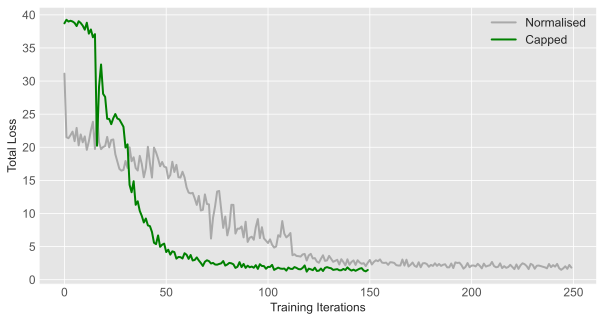

In [ ]:
plt.figure(figsize=(10, 5))

xlim = 250
line_width = 2

# Plot each series with distinct styles
plt.plot(uncapped_total_loss, label='Normalised', linewidth=line_width, color='darkgrey')
plt.plot(capped_total_loss_df, label='Capped', linewidth=line_width, color='green')

# axs[0].set_title('Policy 1', fontsize=14, fontweight='bold')
# plt.legend(title='Policy 1', title_fontsize='12', fontsize='12', loc='best')
plt.legend(fontsize='12', loc='best')
plt.xlabel('Training Iterations', fontsize=12)
plt.ylabel('Total Loss', fontsize=12)
plt.grid(True, 'both')
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

## Statistical tests to see significance between data and fixed time control - for alpha values?

## Stats analysis - looking at the energies of 2 terms in reward function - at what ratio of energies can we correlate with better overall system performance? 

In [ ]:
fixed_tc_df = get_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[0], 
                                eval_dir = "fixed_tc", 
                                csv_file_name='eval_metrics.csv',
                                seed = 10)
trained_0_8_df = get_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[1], 
                                eval_dir = "trained",
                                csv_file_name='eval_metrics.csv',
                                seed = 10)

NameError: name 'TRAINED_CHECKPOINT_PATHS_ABS' is not defined

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
type((fixed_tc_df['1_accumulated_waiting_time']/100).diff())

NameError: name 'fixed_tc_df' is not defined

perform the transformations on accumulated waiting time

In [ ]:
agent_1_fc_accum_wait_group_five = fixed_tc_df['1_accumulated_waiting_time'].groupby(
    fixed_tc_df['1_accumulated_waiting_time'].index // 5).sum()

agent_1_fc_accum_wait_scale_diff = (agent_1_fc_accum_wait_group_five/100).diff()


NameError: name 'fixed_tc_df' is not defined

In [ ]:
# cap the series
fixed_tc_diff_capped_array = np.where(agent_1_fc_accum_wait_scale_diff.isna() | (agent_1_fc_accum_wait_scale_diff > 0), 0, agent_1_fc_accum_wait_scale_diff)

NameError: name 'agent_1_fc_accum_wait_scale_diff' is not defined